# 0. Import Library

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [2]:
df = pd.read_csv('data/iris.csv')

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg)

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## 2.2 Data Cleaning

### - Missing Value

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### - Inconsistent Data

### - Outliers

## 2.3 Data Transformation

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

In [10]:
columns = ['Species']
enc_columns, lb=labelEncode(df, columns)

In [11]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
87,88,6.3,2.3,4.4,1.3,Iris-versicolor,1
79,80,5.7,2.6,3.5,1.0,Iris-versicolor,1
34,35,4.9,3.1,1.5,0.1,Iris-setosa,0
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,1
31,32,5.4,3.4,1.5,0.4,Iris-setosa,0
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,1
93,94,5.0,2.3,3.3,1.0,Iris-versicolor,1
84,85,5.4,3.0,4.5,1.5,Iris-versicolor,1
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2
125,126,7.2,3.2,6.0,1.8,Iris-virginica,2


In [12]:
for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('  -------')

Species
  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
  [0 1 2]
  -------


## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [13]:
#data.to_csv('รหัส.csv',index=False)
#data.to_excel('รหัส.xlsx',index=False)

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_Encoded,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


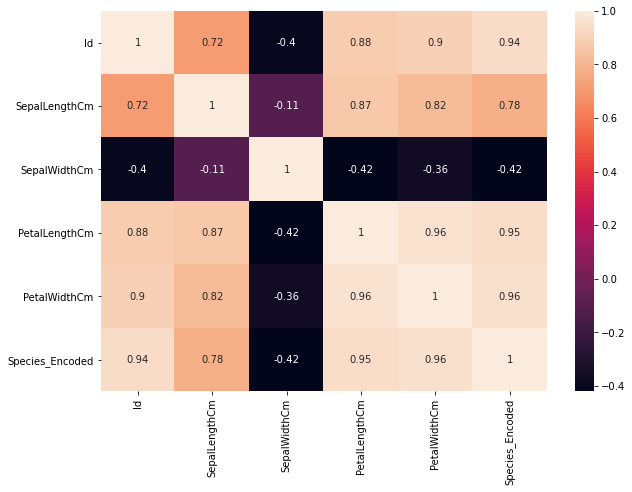

In [15]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.5 การกำหนด Feature / Target

In [16]:
DataMatrix = df.values
DataMatrix.shape

(150, 7)

In [17]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols].values
Y = df.Species_Encoded.values

## 2.6 Data Preparation (แบ่งข้อมูลสำหรับ Training / Testing)

In [18]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 3. Modelling: Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

## 3.1 Training Process

In [20]:
model = GaussianNB()
model.fit(X_Train, Y_Train)

GaussianNB()

In [21]:
model.score(X_Train, Y_Train)

0.9428571428571428

## 3.2 Testing Process

In [22]:
y_predict = model.predict(X_Test)

In [23]:
y_predict_class = lb.inverse_transform(y_predict)

In [24]:
for res, label in zip(y_predict, y_predict_class):
    print('Result: {} - {}'.format(res, label))

Result: 2 - Iris-virginica
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 0 - Iris-setosa
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 2 - Iris-virginica
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 0 - Iris-setosa
Result: 0 - Iris-setosa
Result: 1 - Iris-versicolor
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 2 - Iris-virginica
Result: 2 - Iris-virginica
Result: 1 - Iris-versicolor
Result: 0 - Iris-setosa
Result: 1 - Iris-versicol

# 4. Model Evaluation

## 4.1 Split Test

In [25]:
from sklearn import metrics

In [26]:
cnf_matrix = metrics.confusion_matrix(Y_Test, y_predict)
cnf_matrix

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

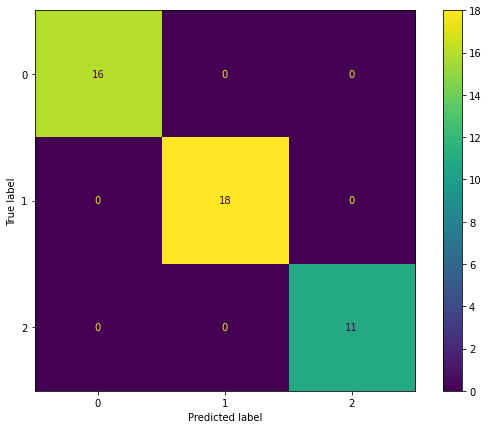

In [27]:
plt.rcParams['figure.figsize'] = 10,7 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()

In [28]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(Y_Test, y_predict, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## 4.2 Cross Validation Test

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cvs = cross_val_score(model, X, Y, cv=2)

In [31]:
print('Cross Validation Score {}'.format(cvs))

Cross Validation Score [0.92 0.96]


In [32]:
print('Mean: {:4f}'.format(cvs.mean()))

Mean: 0.940000


# [Optional] Save Machine Learning Models

In [33]:
#import pickle
#filename = 'pickle_รหัสนศ.sav'
#pickle.dump(model, open(filename, 'wb'))